In [12]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 13

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [13]:
def load_images(datagenerator, path, labels, img_width, img_height, batch_size=5):
    '''
    Helper function for loading images into training and validation sets.
    
    Arguments:
    datagenerator --- ImageDataGenerator object
    path          --- Path to main folder from which to load images
    labels        --- List of labeled subfolders from which to load images
    img_width     --- Target width of loaded images
    img_height    --- Target height of loaded images
    batch_size    --- Batch size of loaded images
    '''
    train_data = datagenerator.flow_from_directory(path, 
                                                   target_size=(img_w, img_h), 
                                                   batch_size=batch_size, 
                                                   subset='training', 
                                                   classes=labels)

    validation_data = datagenerator.flow_from_directory(path, 
                                                        target_size=(img_width, img_height), 
                                                        batch_size=batch_size, 
                                                        subset='validation',
                                                        classes=labels)
    
    return train_data, validation_data


path = 'PokemonData/'
img_w = 200
img_h = 200

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

## Starter pokemons

First we'll train a smaller model to be able to classify the three different starter pokemons: Bulbasaur, Charmander and Squirtle.

In [14]:
labels_starter = ['Bulbasaur', 'Charmander', 'Squirtle']

train_starter, val_starter = load_images(datagen, path, labels_starter, img_width=img_w, img_height=img_h)

Found 130 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


Let's plot one batch of training data:

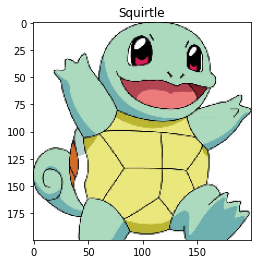

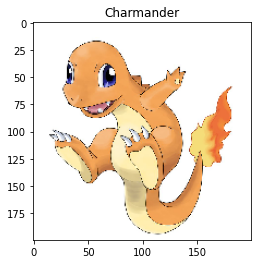

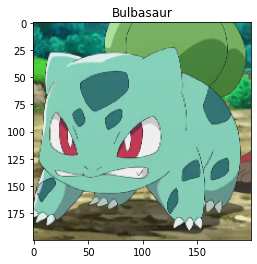

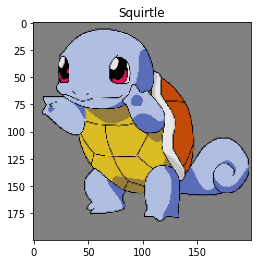

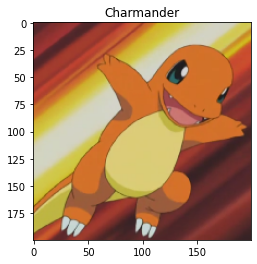

In [15]:
x, y = next(train_starter)

for x,y in zip(x, y):
    plt.imshow(x)
    plt.title(labels_starter[np.argmax(y)])
    plt.show()

In [8]:
model_starter = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=len(labels_starter), activation='softmax')
])

model_starter.compile(optimizer='adam',
                     loss=tf.losses.CategoricalCrossentropy(),
                     metrics=['accuracy'])

history_starter = model_starter.fit(train_starter,
                                    epochs=5,
                                    validation_data=val_starter,
                                    verbose=1)

Epoch 1/5
26/26 [==============================] - 4s 144ms/step - loss: 13.6963 - accuracy: 0.3713 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 2s 83ms/step - loss: 0.1849 - accuracy: 0.9610 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 3/5
26/26 [==============================] - 2s 83ms/step - loss: 0.0264 - accuracy: 0.9893 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 2s 83ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 5/5
26/26 [==============================] - 2s 84ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000


Let's print a batch of validation images and their predicted labels.

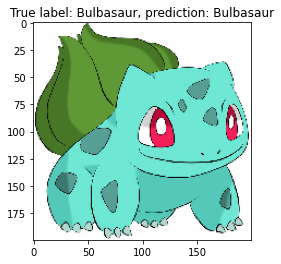

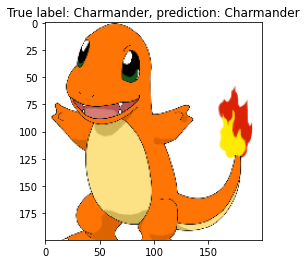

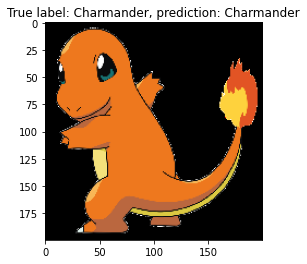

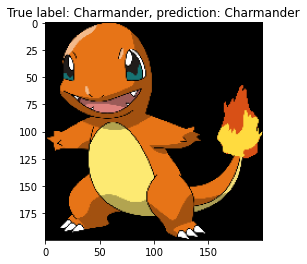

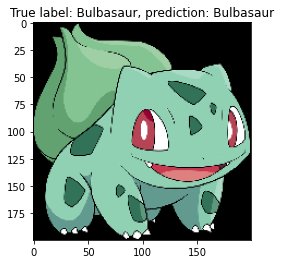

3/3 [==============================] - 0s 49ms/step - loss: 0.0142 - accuracy: 1.0000


In [9]:
x_starter, y_starter = next(val_starter)

pred_starter = model_starter.predict(x_starter)

for x, y, pred in zip(x_starter, y_starter, pred_starter):
    plt.imshow(x)
    plt.title("True label: {}, prediction: {}".format(labels_starter[y.argmax()], labels_starter[pred.argmax()]))
    plt.show()
    
eval_starter = model_starter.evaluate(val_starter)

Great, with a simple two layer CNN we already get 100 % accuracy on both the training and validation data. This task is expectedly easy, since the three starter pokemons are so distinct in both their shapes and colors. Now let's move on to training a model that classifies the starter pokemons and all their evolutions.


### Starter pokemons and their evolutions

In [10]:
labels_evo = ['Bulbasaur', 'Ivysaur', 'Venosaur', 
              'Charmander', 'Charmeleon', 'Charizard', 
              'Squirtle', 'Wartortle', 'Blastoise']

train_evo, val_evo = load_images(datagen, path, labels_evo, img_width=img_w, img_height=img_h)

Found 322 images belonging to 9 classes.
Found 33 images belonging to 9 classes.


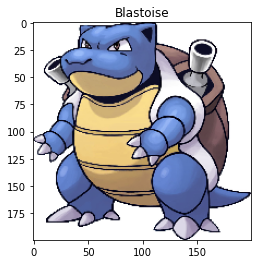

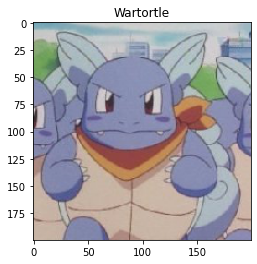

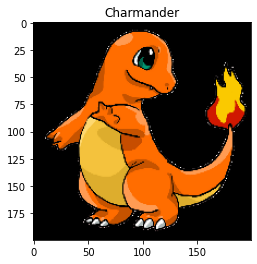

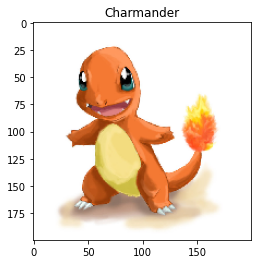

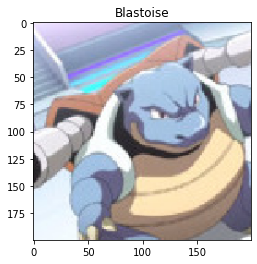

In [11]:
x, y = next(train_evo)

for x,y in zip(x, y):
    plt.imshow(x)
    plt.title(labels_evo[np.argmax(y)])
    plt.show()

In [322]:
model_evo = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=len(labels_evo), activation='softmax')
])

model_evo.compile(optimizer='adam',
             loss=tf.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

history_evo = model_evo.fit(train_evo,
                            epochs=10,
                            validation_data=val_evo, 
                            verbose=1)

Epoch 1/10
65/65 [==============================] - 7s 102ms/step - loss: 4.3441 - accuracy: 0.1960 - val_loss: 0.9881 - val_accuracy: 0.5152
Epoch 2/10
65/65 [==============================] - 6s 99ms/step - loss: 0.6930 - accuracy: 0.7712 - val_loss: 0.5244 - val_accuracy: 0.8485
Epoch 3/10
65/65 [==============================] - 7s 101ms/step - loss: 0.3074 - accuracy: 0.9158 - val_loss: 0.4324 - val_accuracy: 0.8788
Epoch 4/10
65/65 [==============================] - 7s 103ms/step - loss: 0.0773 - accuracy: 0.9983 - val_loss: 0.2547 - val_accuracy: 0.9091
Epoch 5/10
65/65 [==============================] - 6s 100ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.8788
Epoch 6/10
65/65 [==============================] - 7s 101ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1599 - val_accuracy: 0.9394
Epoch 7/10
65/65 [==============================] - 7s 100ms/step - loss: 8.8131e-04 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.9697
Epo

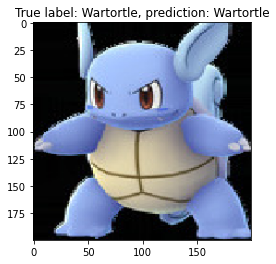

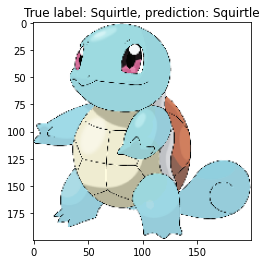

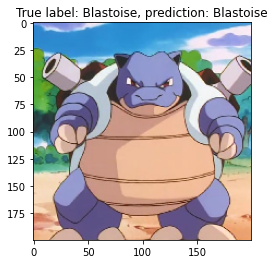

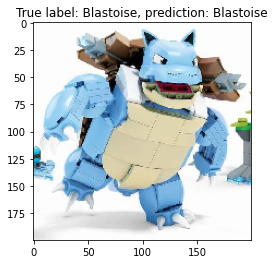

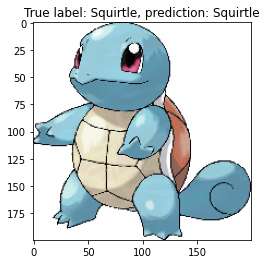

7/7 [==============================] - 1s 68ms/step - loss: 0.1252 - accuracy: 0.9697


In [7]:
#model_evo.save('Saved_models/Model_evo')
model_evo = keras.models.load_model('Saved_models/Model_evo')

x_evo, y_evo = next(val_evo)

pred_evo = model_evo.predict(x_evo)

for x, y, pred in zip(x_evo, y_evo, pred_evo):
    plt.imshow(x)
    plt.title("True label: {}, prediction: {}".format(labels_evo[y.argmax()], labels_evo[pred.argmax()]))
    plt.show()
    
    
eval_evo = model_evo.evaluate(val_evo)

By simply adding another another 2D convolution layer to the model we manage to get a model with 100 % training accuracy and approximately 97 % validation accuracy, which is pretty great result.